In [1]:
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import scrublet as scr
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
control = sc.read_h5ad("GSE263300/GSM8189314_aavsi_matrix.h5ad")
mutant = sc.read_h5ad("GSE263300/GSM8189315_sf3bi_matrix.h5ad")

control.obs['dataset'] = 'control'
mutant.obs['dataset'] = 'mutant'

adata = control.concatenate(mutant, join='outer', batch_key='dataset', batch_categories=['control', 'mutant'], index_unique=None)

/tmp/ipykernel_3400/2963641158.py:7: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = control.concatenate(mutant, join='outer', batch_key='dataset', batch_categories=['control', 'mutant'], index_unique=None)
/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
print(adata)

AnnData object with n_obs × n_vars = 22454 × 36601
    obs: 'dataset'
    var: 'gene_ids', 'feature_types'


In [4]:
adata.obs.dataset

AAACCCAAGCGTATGG-1    control
AAACCCAAGGCATCAG-1    control
AAACCCACAGTGTATC-1    control
AAACCCATCACTCCGT-1    control
AAACGAAAGGGTTGCA-1    control
                       ...   
TTTGTTGCATTCGGGC-1     mutant
TTTGTTGGTGGCAGAT-1     mutant
TTTGTTGGTGTTGACT-1     mutant
TTTGTTGGTTAGGACG-1     mutant
TTTGTTGTCACCGGGT-1     mutant
Name: dataset, Length: 22454, dtype: category
Categories (2, object): ['control', 'mutant']

In [5]:
scrub = scr.Scrublet(adata.X)
doublet_scores, predicted_doublets = scrub.scrub_doublets()
adata.obs['doublet_scores'] = doublet_scores
adata.obs['predicted_doublets'] = predicted_doublets
adata = adata[~predicted_doublets, :]

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.30
Detected doublet rate = 5.0%
Estimated detectable doublet fraction = 40.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 12.5%
Elapsed time: 51.8 seconds


In [6]:
adata.var['mt'] = adata.var.index.str.startswith('MT-')

/tmp/ipykernel_3400/310233584.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var.index.str.startswith('MT-')
/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [7]:
adata.var

,gene_ids,feature_types,mt
MIR1302-2HG,ENSG00000243485,Gene Expression,False
FAM138A,ENSG00000237613,Gene Expression,False
OR4F5,ENSG00000186092,Gene Expression,False
AL627309.1,ENSG00000238009,Gene Expression,False
AL627309.3,ENSG00000239945,Gene Expression,False
...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,False
AC023491.2,ENSG00000278633,Gene Expression,False
AC007325.1,ENSG00000276017,Gene Expression,False
AC007325.4,ENSG00000278817,Gene Expression,False


In [8]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [9]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [10]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

In [11]:
adata.var

,gene_ids,feature_types,mt,ribo
MIR1302-2HG,ENSG00000243485,Gene Expression,False,False
FAM138A,ENSG00000237613,Gene Expression,False,False
OR4F5,ENSG00000186092,Gene Expression,False,False
AL627309.1,ENSG00000238009,Gene Expression,False,False
AL627309.3,ENSG00000239945,Gene Expression,False,False
...,...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,False,False
AC023491.2,ENSG00000278633,Gene Expression,False,False
AC007325.1,ENSG00000276017,Gene Expression,False,False
AC007325.4,ENSG00000278817,Gene Expression,False,False


In [12]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

In [13]:
adata.var.sort_values('n_cells_by_counts')

,gene_ids,feature_types,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AC010157.1,ENSG00000229458,Gene Expression,False,False,0,0.000000,100.000000,0.0
IGKV1D-33,ENSG00000239975,Gene Expression,False,False,0,0.000000,100.000000,0.0
IGKV3D-34,ENSG00000253501,Gene Expression,False,False,0,0.000000,100.000000,0.0
IGKV1D-35,ENSG00000232747,Gene Expression,False,False,0,0.000000,100.000000,0.0
IGKV2D-36,ENSG00000253127,Gene Expression,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...,...,...
MT-CO3,ENSG00000198938,Gene Expression,True,False,21315,248.615387,0.060953,5302469.0
MT-ATP6,ENSG00000198899,Gene Expression,True,False,21316,173.972992,0.056264,3710496.0
MT-CO2,ENSG00000198712,Gene Expression,True,False,21317,229.601608,0.051575,4896943.0
MT-CO1,ENSG00000198804,Gene Expression,True,False,21320,270.652954,0.037509,5772486.0


In [14]:
sc.pp.filter_cells(adata, min_genes=200)
adata = adata[adata.obs['total_counts'] > 5000, :]
sc.pp.filter_genes(adata, min_cells=3)

/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:282: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number
/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [15]:
%matplotlib inline

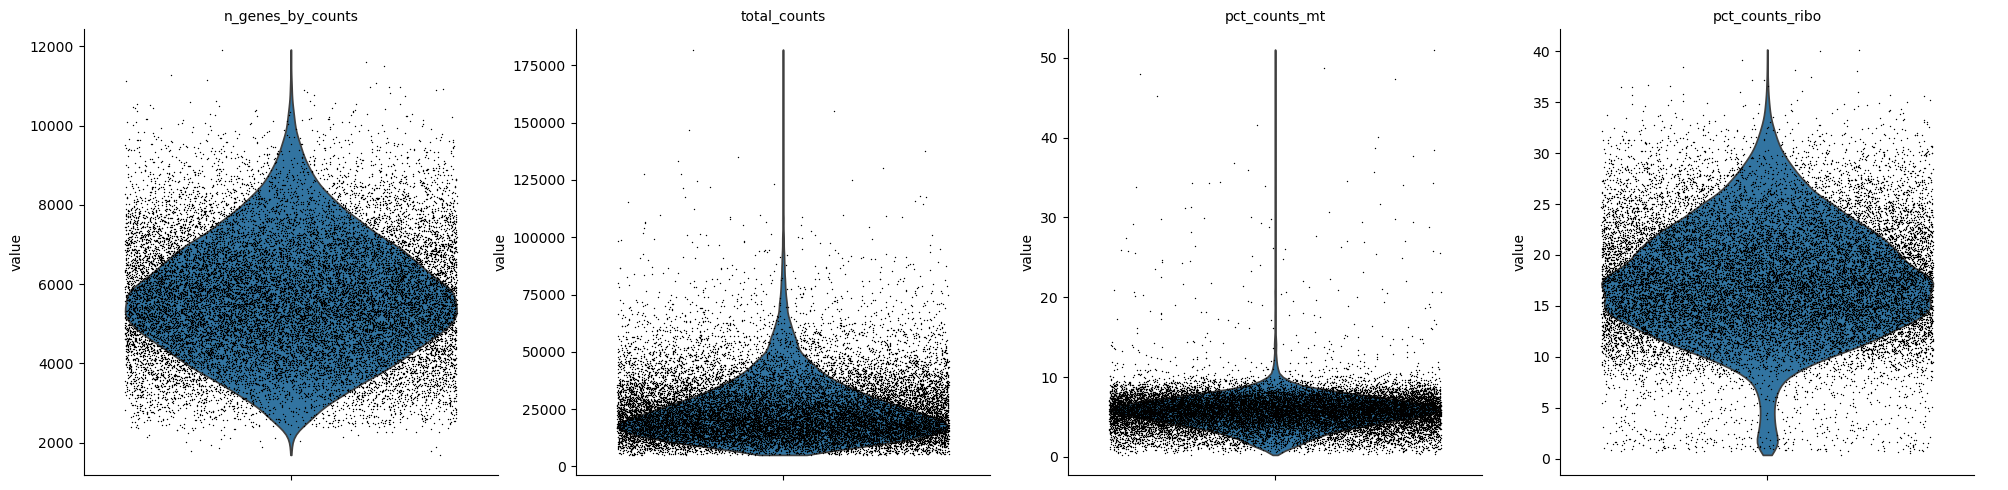

In [16]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)

In [17]:
adata = adata[adata.obs.pct_counts_mt < 10]

In [18]:
adata.shape

(20551, 30099)

In [19]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [20]:
adata.raw = adata

In [21]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000)

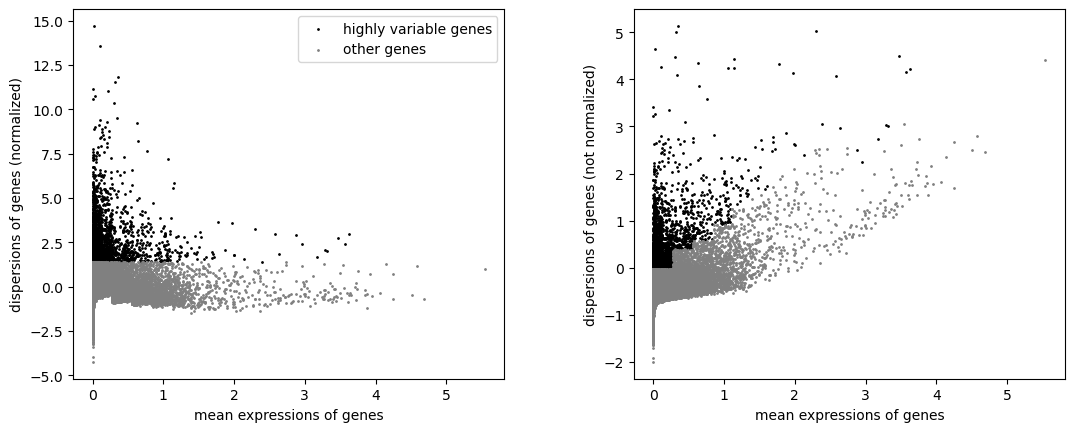

In [22]:
sc.pl.highly_variable_genes(adata)

In [23]:
adata = adata[:, adata.var.highly_variable]

In [24]:
sc.tl.pca(adata, svd_solver='arpack')

/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:325: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca
/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


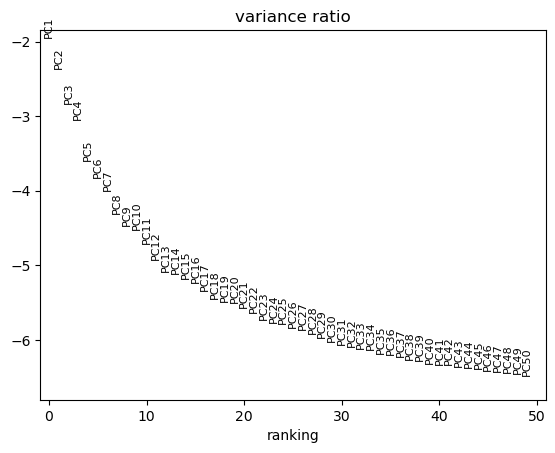

In [25]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [26]:
sc.pp.neighbors(adata, n_neighbors=80, n_pcs=20)
sc.tl.umap(adata)
sc.tl.leiden(adata, random_state=84)

/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_3400/2250748334.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, random_state=84)


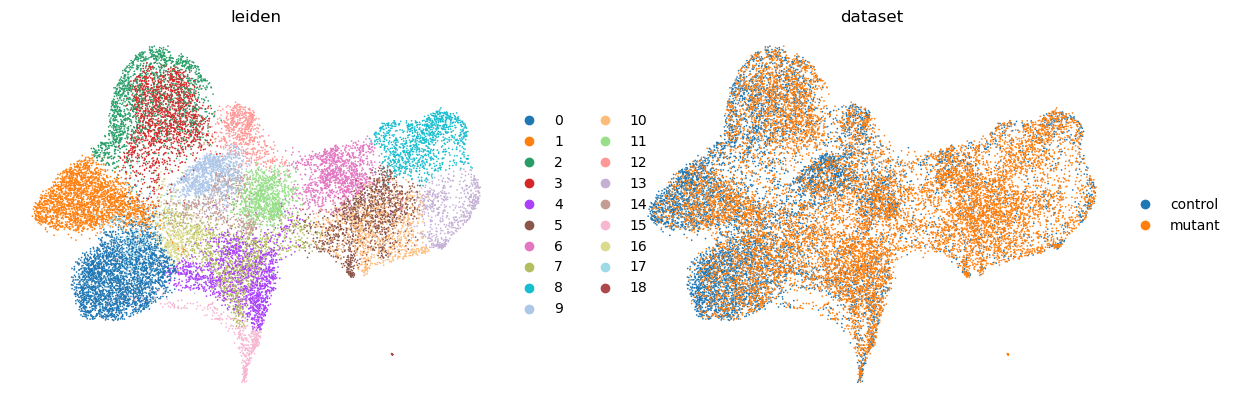

In [27]:
sc.pl.umap(adata, color=['leiden', 'dataset'], frameon = False)

In [28]:
adata.write_h5ad('GSE263300/integrated.h5ad')

In [29]:
adata

AnnData object with n_obs × n_vars = 20551 × 2000
    obs: 'dataset', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', 'leiden'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'dataset_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [30]:
markers = {
    'HSC': ['PROM1', 'AVP', 'HLF'],
    'early_HSPC': ['PROM1', 'CD34'],
    'GMP_myeloid': ['MPO', 'ELANE', 'AZU1', 'S100A8', 'S100A9'],
    'MEP_erythroid': ['KLF1', 'TFRC', 'GATA1'],
    'MEP_megakaryocyte': ['PF4', 'ITGA2B', 'GP9'],
    'MCP_mast': ['KIT', 'KRT1']
}

In [31]:
def calculate_average_expression(adata, markers):
    avg_expr = {}
    
    for cell_type, genes in markers.items():
        valid_genes = [gene for gene in genes if gene in adata.var_names]
        if valid_genes:
            avg_expr[cell_type] = np.mean(adata[:, valid_genes].X, axis=1).A1  
        else:
            avg_expr[cell_type] = np.zeros(adata.n_obs)
    
    avg_expr_df = pd.DataFrame(avg_expr, index=adata.obs_names)
    
    return avg_expr_df

In [32]:
avg_expr_df = calculate_average_expression(adata, markers)

In [33]:
def assign_cell_types_to_cluster(adata, avg_expr_df, markers):
    cluster_cell_types = {}
    
    for cluster in adata.obs['leiden'].unique():
        cells_in_cluster = adata.obs[adata.obs['leiden'] == cluster].index        
        cluster_avg_expr = avg_expr_df.loc[cells_in_cluster]        
        mean_expr_per_cell_type = cluster_avg_expr.mean(axis=0)        
        best_cell_type = mean_expr_per_cell_type.idxmax()        
        cluster_cell_types[cluster] = f"{cluster}_{best_cell_type}"

    adata.obs['clusters'] = adata.obs['leiden'].map(cluster_cell_types)
    return adata

adata = assign_cell_types_to_cluster(adata, avg_expr_df, markers)

In [34]:
def assign_cell_types(adata, avg_expr_df, markers):
    cell_types = {}
    
    for cluster in adata.obs['leiden'].unique():
        cells_in_cluster = adata.obs[adata.obs['leiden'] == cluster].index        
        cluster_avg_expr = avg_expr_df.loc[cells_in_cluster]        
        mean_expr_per_cell_type = cluster_avg_expr.mean(axis=0)        
        best_cell_type = mean_expr_per_cell_type.idxmax()        
        cell_types[cluster] = best_cell_type

    adata.obs['cell_type'] = adata.obs['leiden'].map(cell_types)        
    return adata
adata = assign_cell_types(adata, avg_expr_df, markers)

In [35]:
print(adata.obs[['leiden', 'cell_type', 'clusters']].head())

                   leiden cell_type    clusters
AAACCCAAGCGTATGG-1      1  MCP_mast  1_MCP_mast
AAACCCAAGGCATCAG-1      4  MCP_mast  4_MCP_mast
AAACCCACAGTGTATC-1      9  MCP_mast  9_MCP_mast
AAACCCATCACTCCGT-1      0  MCP_mast  0_MCP_mast
AAACGAAAGGGTTGCA-1      0  MCP_mast  0_MCP_mast


In [36]:
print(adata.obs.columns)

Index(['dataset', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts',
       'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo',
       'pct_counts_ribo', 'n_genes', 'leiden', 'clusters', 'cell_type'],
      dtype='object')


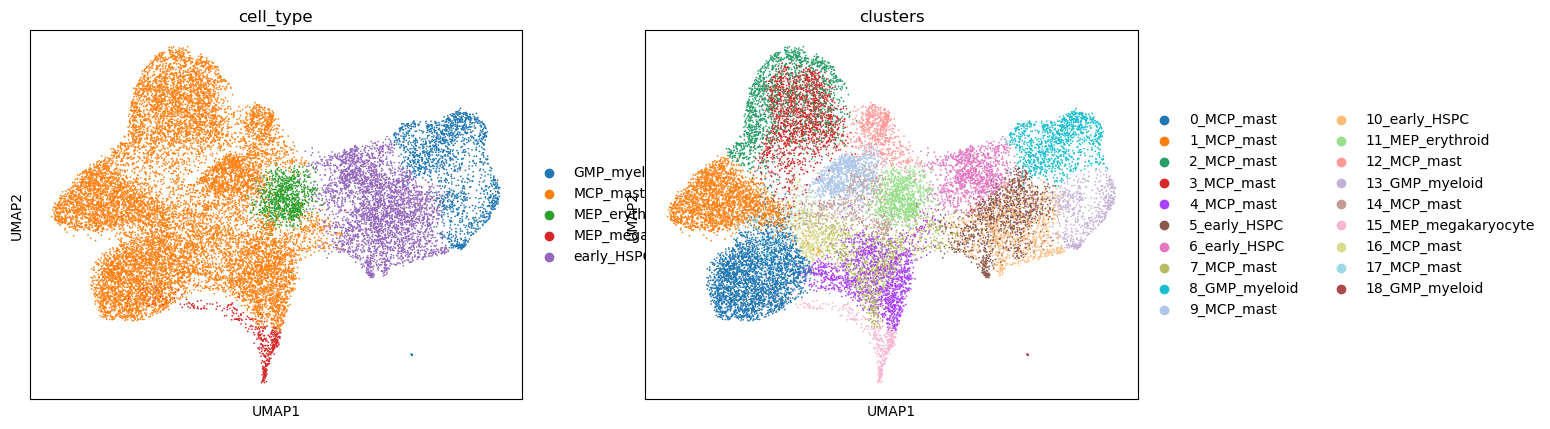

In [37]:
sc.pl.umap(adata, color=['cell_type', 'clusters'])

categories: 0_MCP_mast, 1_MCP_mast, 2_MCP_mast, etc.
var_group_labels: HSC, early_HSPC, GMP_myeloid, etc.


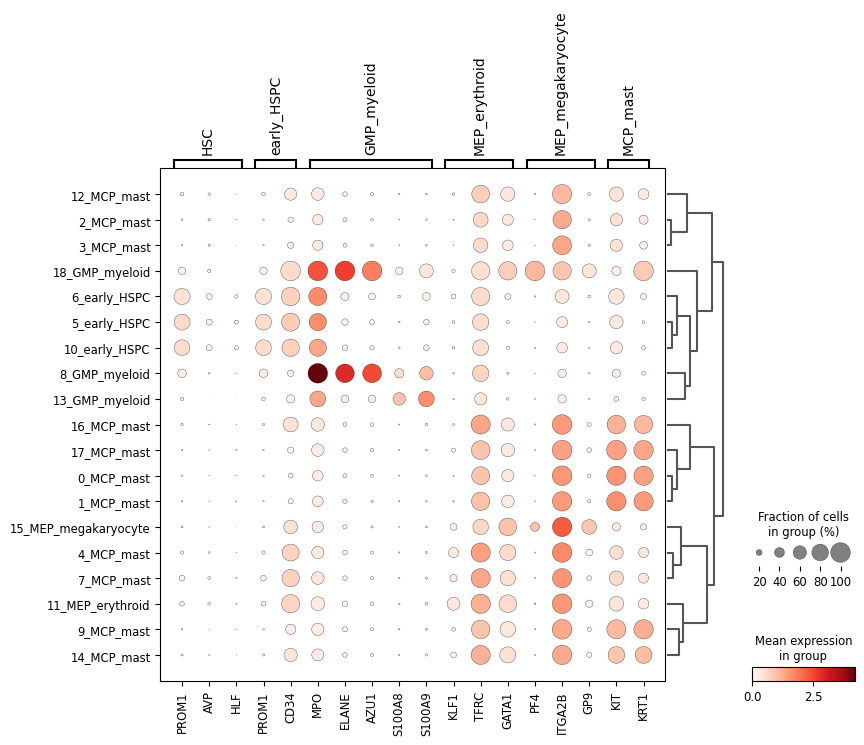

In [38]:
sc.pl.dotplot(adata,markers, groupby= "clusters", dendrogram=True)

In [39]:
cell_types = adata.obs['cell_type'].unique()
cell_types

['MCP_mast', 'early_HSPC', 'GMP_myeloid', 'MEP_erythroid', 'MEP_megakaryocyte']
Categories (5, object): ['GMP_myeloid', 'MCP_mast', 'MEP_erythroid', 'MEP_megakaryocyte', 'early_HSPC']

/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:645: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


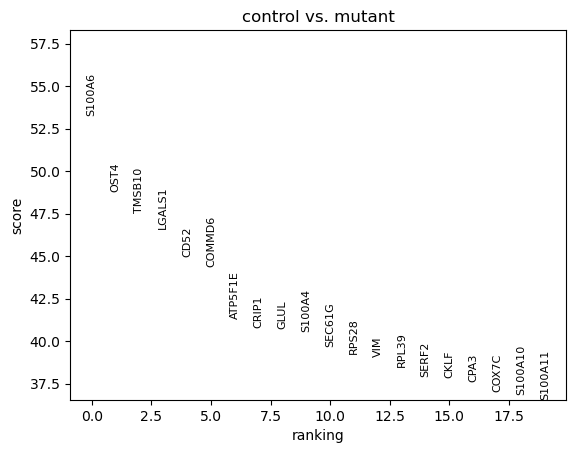

/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:645: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


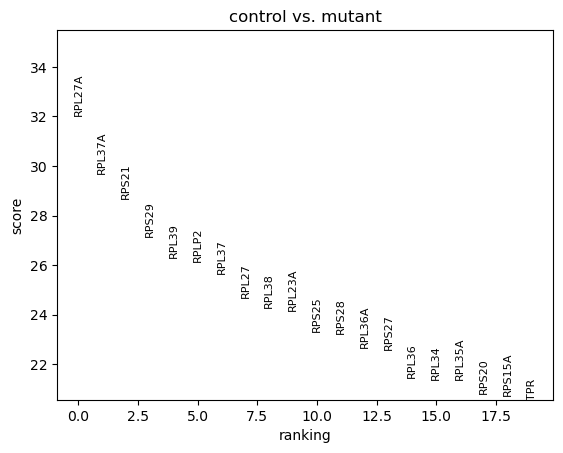

/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:645: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


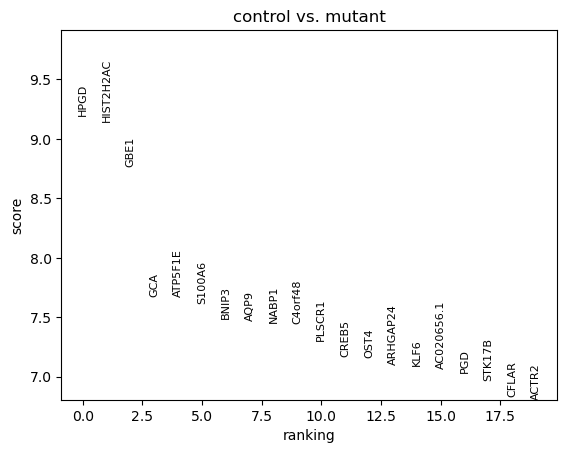

/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:645: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


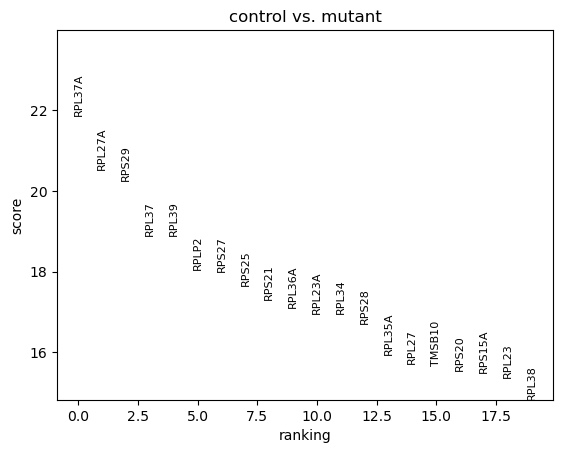

/home/myoui/miniforge3/envs/scanpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:645: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


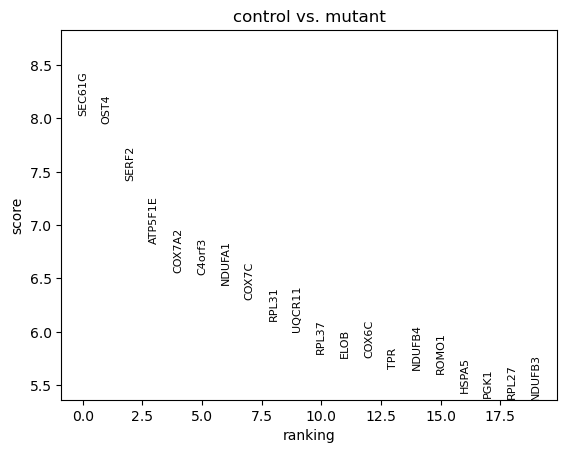

In [40]:
dge_results = {}
for cell_type in cell_types:
    cell_type_data = adata[adata.obs['cell_type'] == cell_type]    
    if 'control' in cell_type_data.obs['dataset'].values and 'mutant' in cell_type_data.obs['dataset'].values:
        sc.tl.rank_genes_groups(cell_type_data, groupby='dataset', groups=['control'], reference='mutant', method='t-test', key_added=f'dge_{cell_type}')        
        sc.pl.rank_genes_groups(cell_type_data, n_genes=20, sharey=False, key=f'dge_{cell_type}')        
        dge_results[cell_type] = cell_type_data.uns[f'dge_{cell_type}']